<a href="https://colab.research.google.com/github/MKastek/time-series-notes/blob/main/Time_series_anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### What is a time series?  

A sequence of data points organized in time order.  
- The sequence captures data at equally spaced points in time.  
- Data collected irregularly is not considered a time series.  

Time series has three components:  
- **Trend** - long-term direction  
- **Seasonality** - periodic behavior  
- **Residual** - irregular fluctuations  

Trend captures the general direction of the time series. Trend can be increasing, decreasing or constant.  

Seasonality captures effects that occur with specific frequency. It can be driven by many factors.  

Residuals are the random fluctuations left over after trend and seasonality are removed.


### Decomposition Models  

Time-series components can be decomposed with the following models:  
- Additive decomposition  
- Multiplicative decomposition  
- Pseudoaddtiive decompostion

### Additive Model  
Additive models assume that the observed time series is the sum of its components.  

- **Observation = Trend + Seasonality + Residual**  
- Additive models are used when the **magnitudes of the seasonal and residual values are independent of trend**

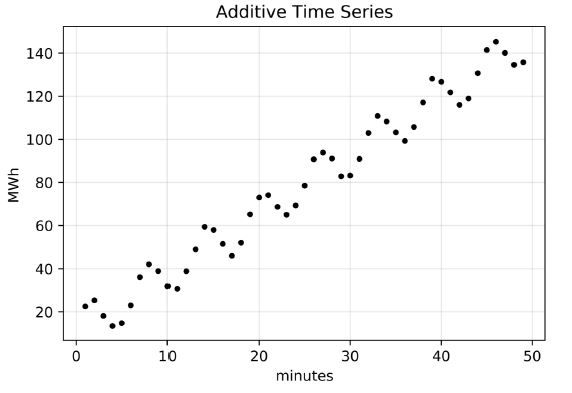

### Multiplicative Model  
The observed time series m ultiplicative models assume that the observed time series is the product of its components.  
- **Observation = Trend * Seasonality * Residual**
- It is possible to transform a multiplicative model to an additive by applying a log transformation:  
- **log(Time * Seasonality * Residual) = log(Time) + log(Seasonality) + log(Residual)**
- Multiplicative models are used when the **magnitudes of the seasonal and
residual values fluctuate with trend**

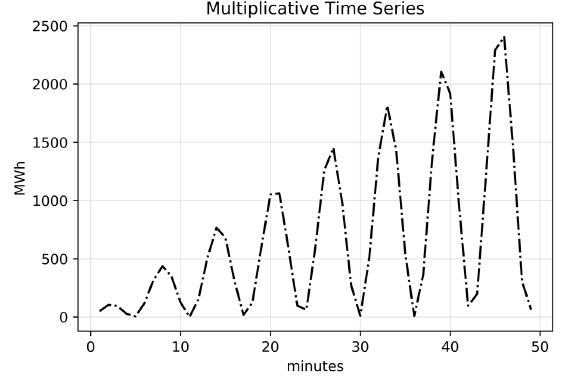

### Additive vs. Multiplicative models

**Additive model**:  
The magnitudes of the seasonal and
residual values fluctuate with trend  

**Multiplicative model**:  
The magnitudes of the seasonal and
residual values are independent of trend

### Pseudoadditive Model  
Pseudoadditive models combine elements of the additive and multiplicative models.
- Useful when time series values are close to or equal to zero and you require a
multiplicative model  
- Division by zero becomes a problem in multiplicative models when this is the
case  
- For example, rewriting the model as follows:  
 $-O_{t}=T_{t}+T_{t}(S_{t}-1)+T_{t}(R_{t}-1)=T_{t}(S_{t}+R_{t}-1)$


### How to decompose a time series  
- single, double or triple exponential smooting   
- locally estrimated scatterplot smoothing (LOESS)  
- Frequency-based methdos  

### Construct Trend, Seasonality, and Residual Components

In [1]:
%matplotlib inline

import sys
import statsmodels as ss
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
time = np.arange(1, 51)
trend = time * 2.75

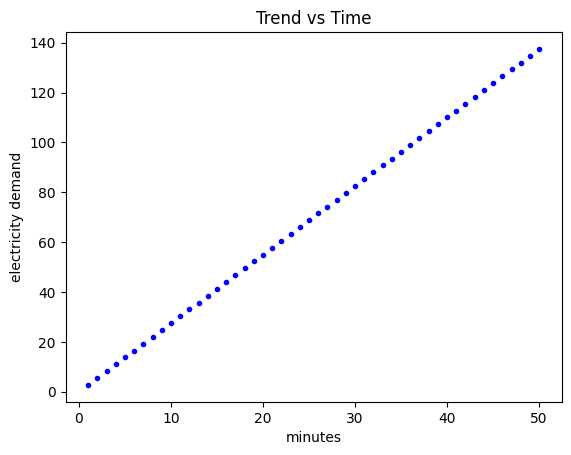

In [3]:
plt.plot(time, trend, 'b.')
plt.title("Trend vs Time")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

In [4]:
seasonal = 10 + np.sin(time) * 10

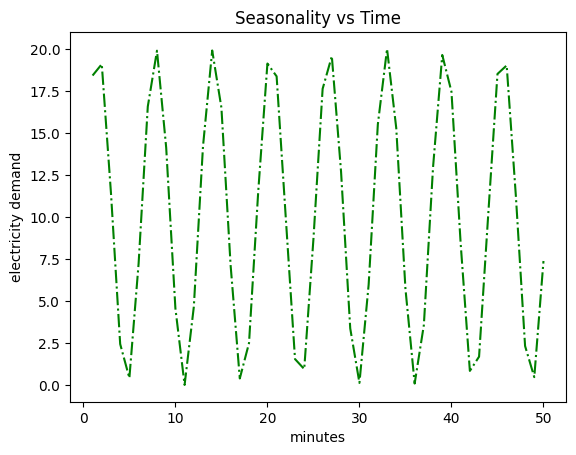

In [5]:
plt.plot(time, seasonal, 'g-.')
plt.title("Seasonality vs Time")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

In [6]:
np.random.seed(10)  # reproducible results
residual = np.random.normal(loc=0.0, scale=1, size=len(time))

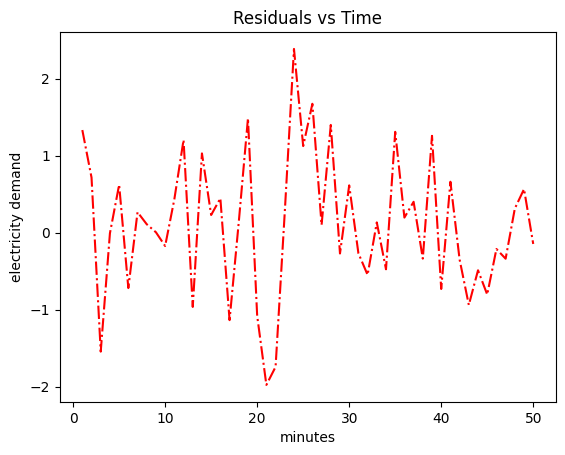

In [7]:
plt.plot(time, residual, 'r-.')
plt.title("Residuals vs Time")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

### Additive time series  

In [8]:
additive = trend + seasonal + residual

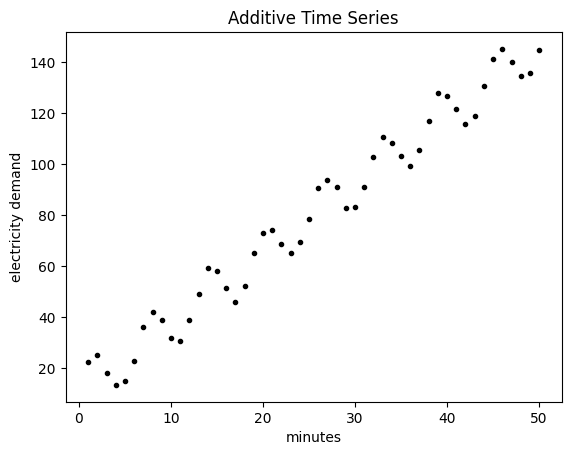

In [9]:
plt.plot(time, additive, 'k.')
plt.title("Additive Time Series")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

### Multiplicative time series  

In [10]:
# ignoring residual to make pattern more apparent
ignored_residual = np.ones_like(residual)
multiplicative = trend * seasonal * ignored_residual

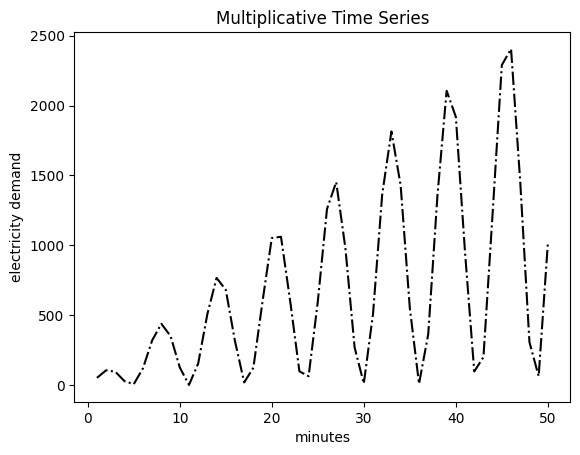

In [11]:
plt.plot(time, multiplicative, 'k-.')
plt.title("Multiplicative Time Series")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

### Time series decomposition  

#### Additive decomposition  

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

ss_decomposition = seasonal_decompose(x=additive, model='additive', period=6)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

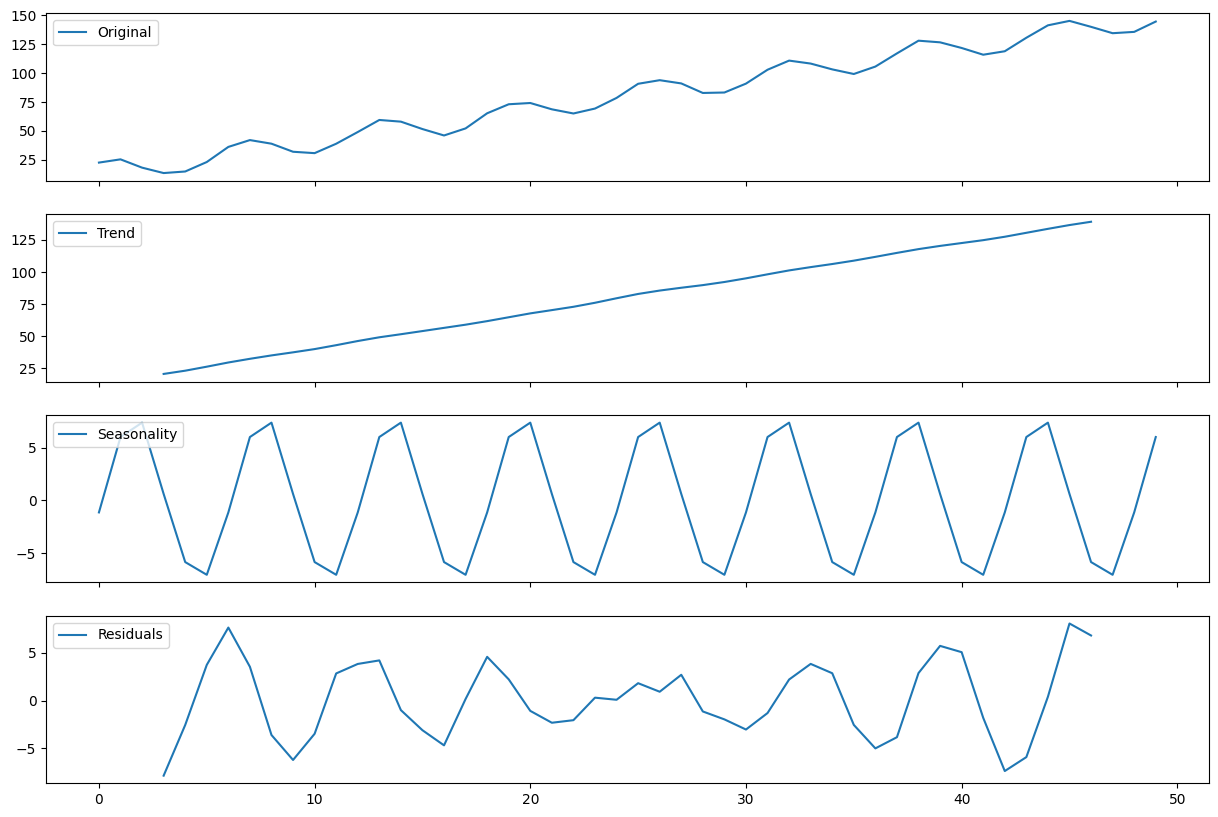

In [17]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(additive, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');

#### Multiplicative decomposition  

In [19]:
ss_decomposition = seasonal_decompose(x=multiplicative, model='multiplicative', period=6)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

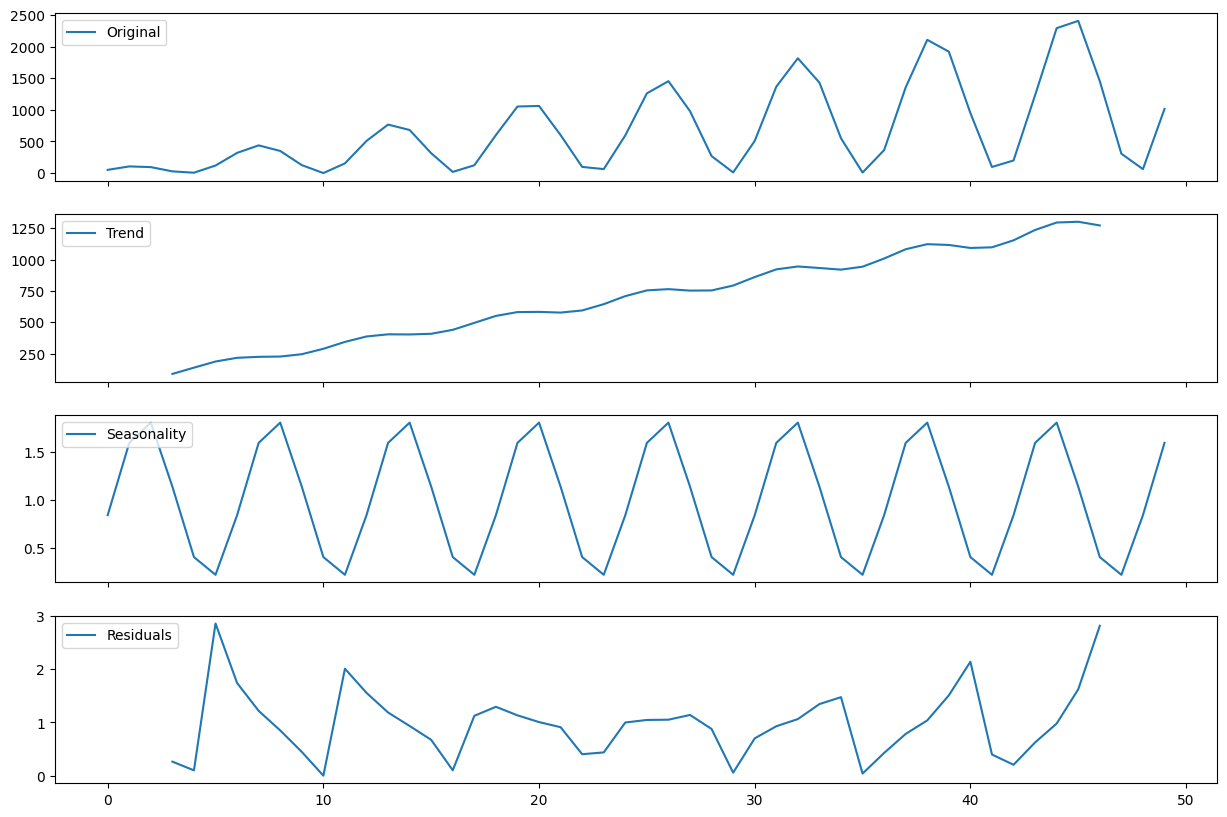

In [20]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(multiplicative, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');

### Stationarity
A stationary time series is a time series where there are no changes in the underlying system:  
- constant mean (no trend)  
- constant variance (no heteroscedcticity)   
- constant autocorrelation structure    
- no periodic component (no seasonality)  

#### Constant mean

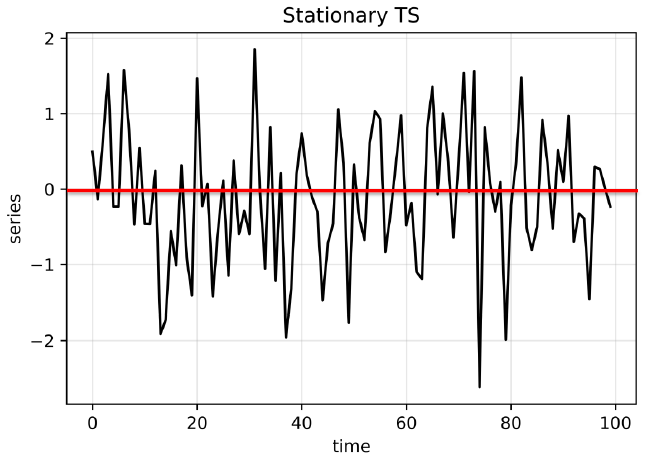

#### Constant variance

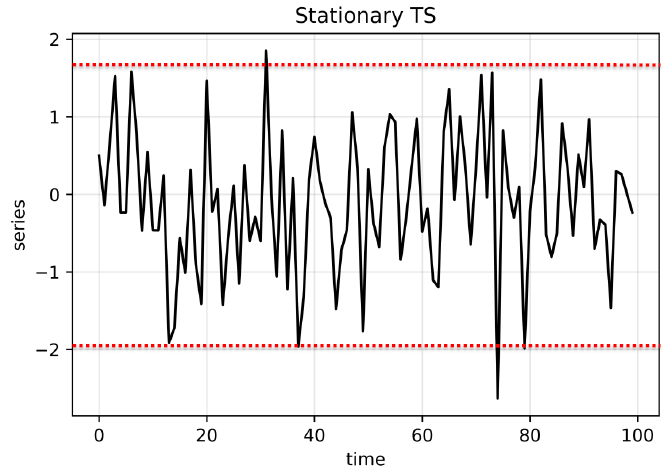

### Autocorrelation  
Autocorrelation is a key concept in time series analysis.  
- Autocorrelation is the correlation between a measurement at two
different times.
- The time interval between values is called the lag.  
- For example, stock prices may be correlated from one day to the next with a lag value of 1.  
- Autocorrelation often results in a pattern, whereas a time series without autocorrelation will exhibit randomness.

### Constant Autocorrelation Structure  
A stationary time series has constant autocorrelation structure throughout the entire series.  
-  If the autocorrelation remains constant throughout the series, a simple transformation can be used to remove the autocorrelation.
- This will be useful for several future models.     

### Why is Stationarity Important?
Stationarity is a fundamental assumption in many
time series forecasting models:  
- Without it many basic time series models would break down.  
- Transformations can be applied to convert a nonstationary time series to a stationary one before modeling.  


### How to Identify Nonstationary Time Series Data  
There are several ways to identify nonstationary
time series data:  
- Run sequence plots  
- Summary statistics  
- Histogram plot  
- Augmented Dickey Fuller test  

### Summary statistics
Calculating the mean and variance over time is a useful way to discern
whether the series is stationary.  

- A simple but effective way to do this is to split your data into chunks over time and compute statistics for each chunk  
- Large deviations in either the mean or the variance among chunks are problematic and mean that your data is nonstationary

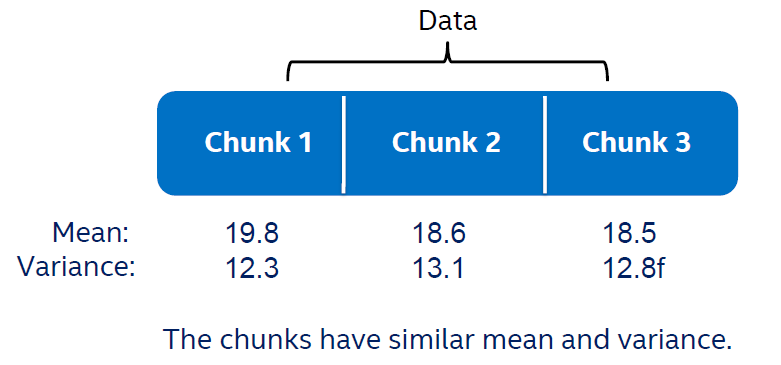

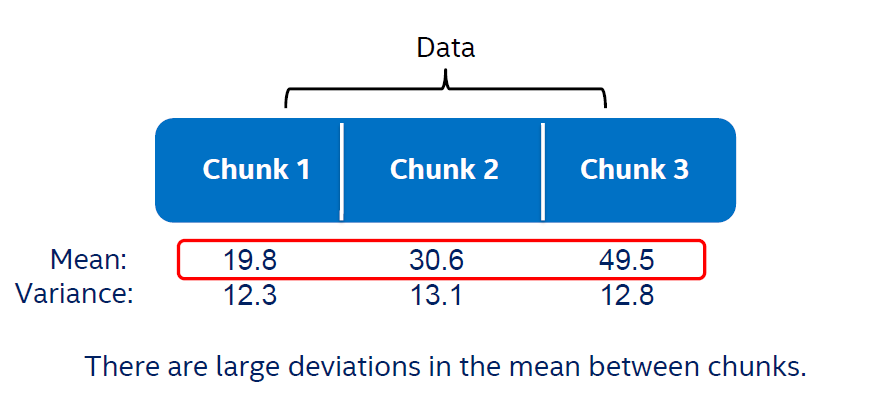

### Histogram plot   
A histogram plot gives important clues into a time series  underlying structure.  
- If you see a distribution that is approximately normal , thats a good indication your time series is stationary.  
- If you see a non n ormal distribution, thats a good indication your time series is nonstationary

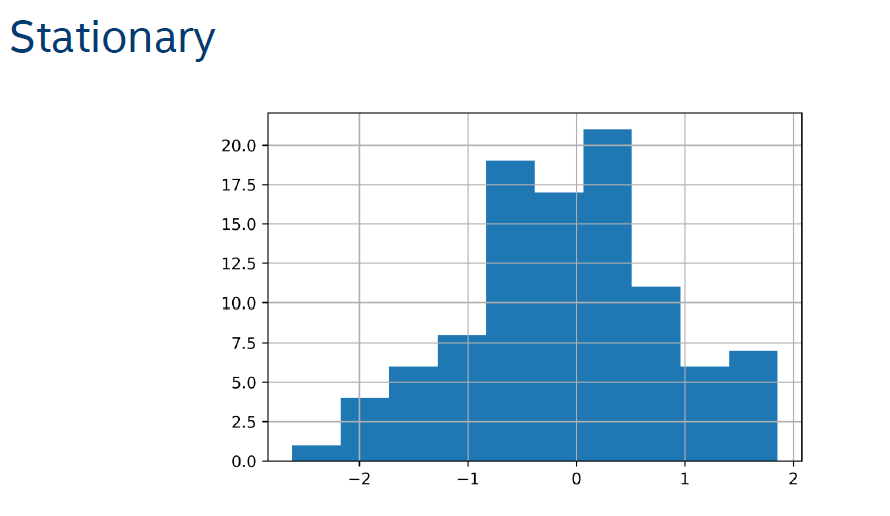

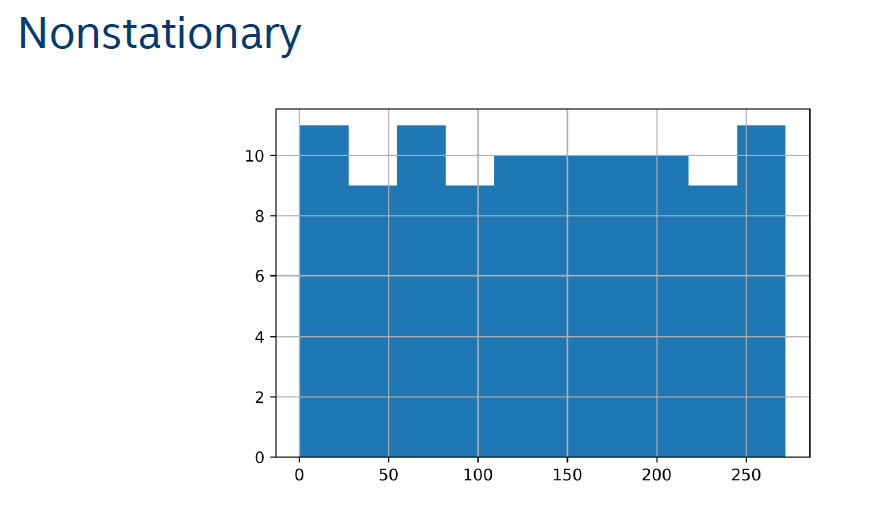

### Augmented Dickey-Fuller Test  
The Augmented Dickey-Fuller test is a hypothesis test that tests specifically for stationarity.  
- We generally say that the series is nonstationary if the `p-value` is less than 0.05.

### How to Transform Nonstationary Time Series Data  
Ways to transform nonstationary time series data:  
- remove trend (constant mean)  
- remove heteroscedasicity with log (constant variance)  
- remove autocorrelation with differencing (exploit constant structure)  
- remove seasonality (no periodic component)

### Trend and Seasonality Present  
A time series with a trend or seasonality component is a nonstationary series.  
To make it stationary, we can do the following:
- Subtract the trend so that the series has constant mean  
- Subtract the seasonality so that the series has no periodic component

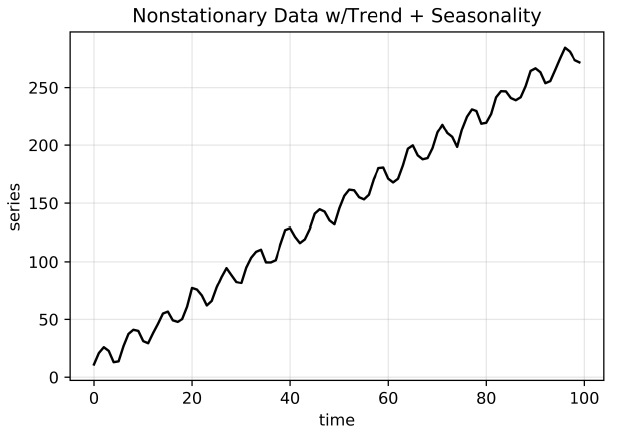

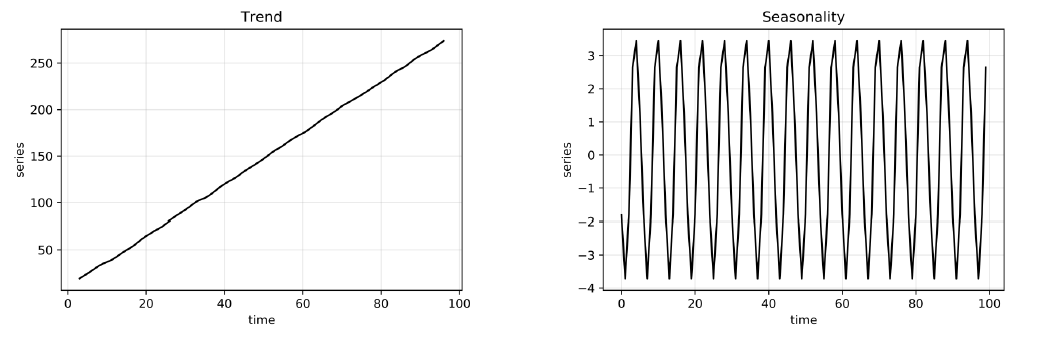

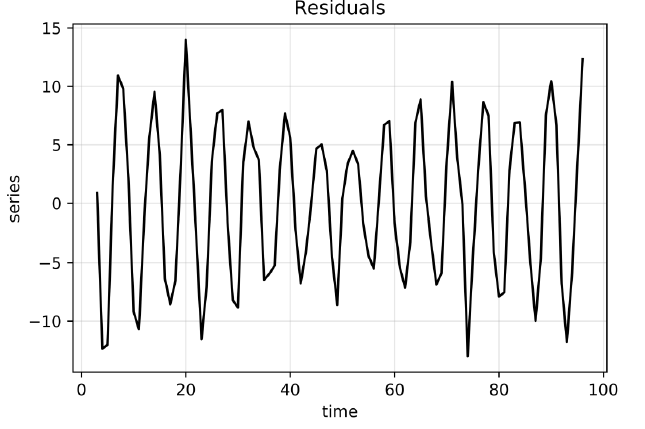

### Heteroscedasticity Present

A time series with differing variances in two distinct regions is a nonstationary series. To make it stationary, we can do the following:  
- Apply the log transformation.  
- Log transformation squashes the larger values so that the variances are closer.

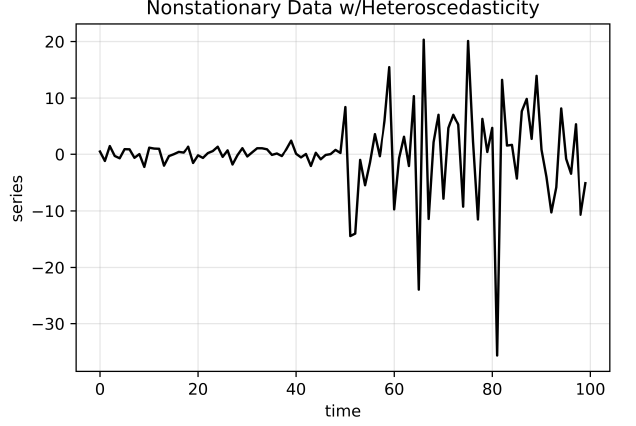

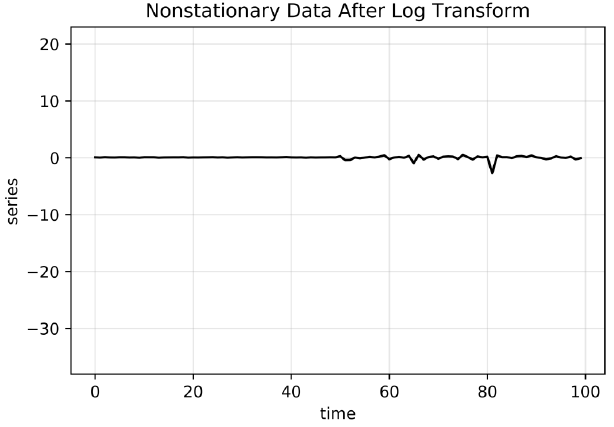

### Autocorrelation Present  
Time series has autocorrelation with a lag of 1. By
definition this is a nonstationary series in its current form. To make it stationary, we can do the following:  
- Difference the data by subtracting by a specific lag  

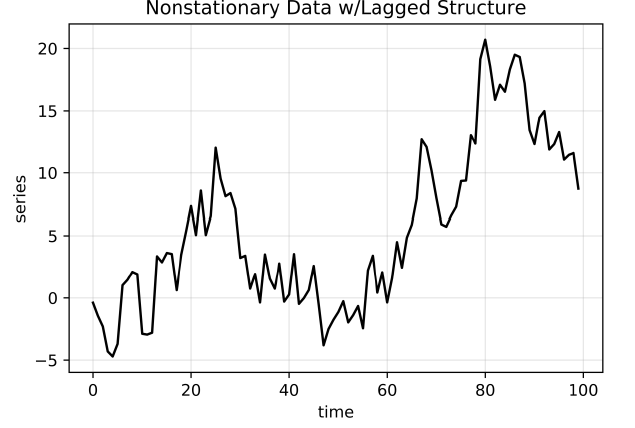

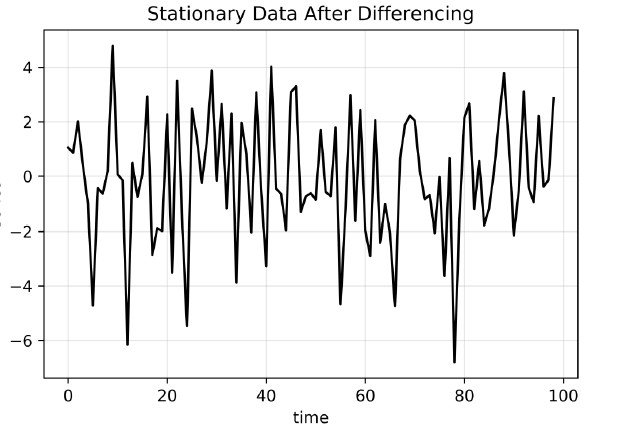